In [1]:
import pandas as pd
import numpy as np
from pymongo import MongoClient

from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn.preprocessing  import StandardScaler

import matplotlib.pyplot as plt

In [2]:
from bdd import ConnexionMongoDB

conn = ConnexionMongoDB()
data = conn.userTweets(5000)


In [3]:
# standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# use K-means

kmeans = KMeans(random_state=42)
kmeans.fit(scaled_features)

KMeans(random_state=42)

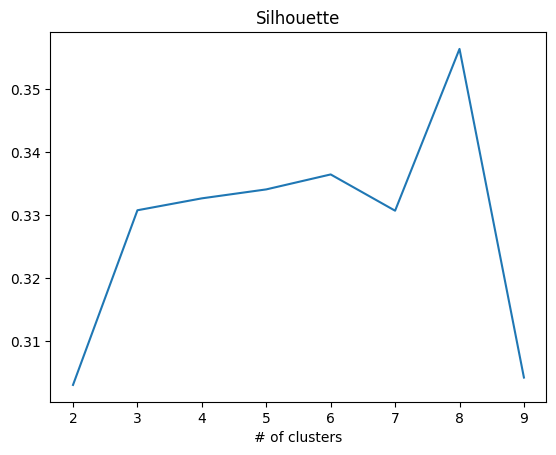

In [4]:
res = []
for k in range(2,10):
    km = cluster.KMeans(n_clusters=k).fit(scaled_features)
    res.append(metrics.silhouette_score(scaled_features,km.labels_))

plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,10,1),res)
plt.show()

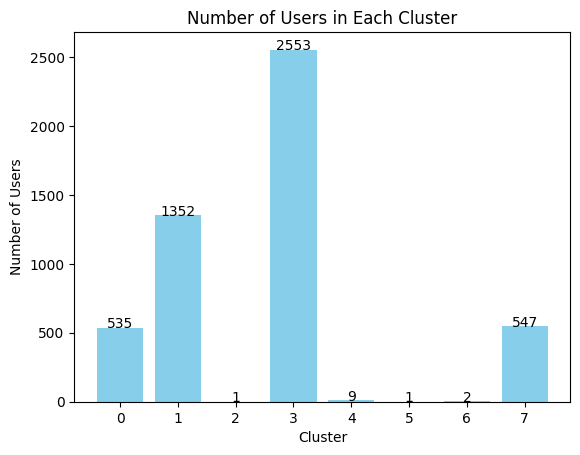

In [5]:
labels = kmeans.labels_

unique_labels, counts = np.unique(labels, return_counts=True)

plt.bar(unique_labels, counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.title('Number of Users in Each Cluster')
plt.xticks(unique_labels)

for i, count in enumerate(counts):
    plt.text(unique_labels[i], count + 0.1, str(count), ha='center')

plt.show()